In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import pandas as pd
%matplotlib inline
terrorism = pd.read_csv('vrtnws/vrtnws.csv')


/home/fabienne/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Make the column names look better and easier to search through
terrorism.columns = terrorism.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '')


In [3]:
# Get a list of all the column names
list(terrorism)


['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [4]:
# Check for duplicate values (0 rows means no duplicates)
terrorism.groupby(by='eventid').filter(lambda x: len(x)>1)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,int_log,int_ideo,int_misc,int_any,related


In [5]:
# First question: what were the ten deadliest terrorist attacks between 1970 and 2017?
# In order to know this we need the date, the number of deaths, and the location so that we know where it happened.
# We may also want the terrorist group. 
terrorism[['nkill', 'iyear', 'imonth', 'iday', 'country_txt', 'city', 'gname']].sort_values('nkill', ascending=False).reset_index().head(10)


,index,nkill,iyear,imonth,iday,country_txt,city,gname
0,133518,1570.0,2014,6,12,Iraq,Tikrit,Islamic State of Iraq and the Levant (ISIL)
1,73126,1384.0,2001,9,11,United States,New York City,Al-Qaida
2,73127,1383.0,2001,9,11,United States,New York City,Al-Qaida
3,55934,1180.0,1994,4,13,Rwanda,Gikoro,Hutu extremists
4,136283,953.0,2014,8,3,Iraq,Sinjar,Islamic State of Iraq and the Levant (ISIL)
5,133225,670.0,2014,6,10,Iraq,Badush,Islamic State of Iraq and the Levant (ISIL)
6,179671,588.0,2017,10,14,Somalia,Mogadishu,Al-Shabaab
7,76347,518.0,2004,3,21,Nepal,Dhading district,Communist Party of Nepal- Maoist (CPN-M)
8,136746,517.0,2014,8,19,Syria,Unknown,Islamic State of Iraq and the Levant (ISIL)
9,170198,433.0,2016,12,10,Syria,Palmyra,Islamic State of Iraq and the Levant (ISIL)


In [6]:
# Second question. Which years had the most casualties and how does this develop over time?
# To answer the first part, we need to know the total of casualties per year.
most_casualties = terrorism[['iyear', 'nkill']].fillna(0)


In [7]:
# This tells us which years had the most casualties, but we can also plot this. Therefore, we need to create
# a new dataframe.
most_casualties.groupby('iyear').nkill.sum().reset_index().sort_values('nkill', ascending=False).head(10)


,iyear,nkill
43,2014,44490.0
44,2015,38853.0
45,2016,34871.0
46,2017,26445.0
42,2013,22273.0
41,2012,15497.0
36,2007,12824.0
26,1997,10924.0
14,1984,10450.0
22,1992,9742.0


In [8]:
total_per_year = most_casualties.groupby('iyear').nkill.sum().reset_index()


In [9]:
# As a sanity check, we can run it against the values we created in the PivotTable in Excel. Everything seems fine. 
total_per_year.sort_values('iyear', ascending=False).head()


,iyear,nkill
46,2017,26445.0
45,2016,34871.0
44,2015,38853.0
43,2014,44490.0
42,2013,22273.0


In [10]:
total_per_year = total_per_year.set_index('iyear')


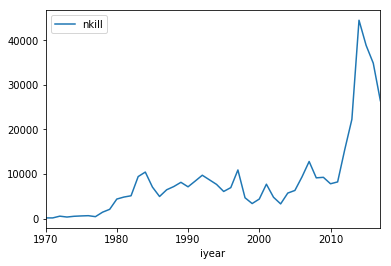

In [11]:
# And here is the simple plot we created. We can see there's a serious spike in the more recent years,
# which we already knew from the table, but this displays it better.
total_per_year.plot()


In [12]:
# Question three: which countries suffered the most terrorist attacks between 1970 and 2017?
# In order to answer this question, we need to count how often each country appears in the list.
terrorism.country_txt.value_counts().head(10)


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

In [13]:
# Sanity check for missing values: luckily, there are none.
terrorism.country_txt.isna().sum()


0

In [14]:
# Question four: which terrorist groups committed the most attacks between 1970 and 2017?
# In order to answer this question, we need to count how often each terrorist group appears in the list.
terrorism.gname.isna().sum()


0

In [15]:
# As we can see, most terrorist attacks aren't claimed by any specific group - but when they're claimed, the Taliban and ISIL are the 
# two most prominent groups.
terrorism.gname.value_counts().head(10)


Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: gname, dtype: int64

In [16]:
# A side question we can answer is: in which countries do these groups commit the most attacks? 
# We'll have to combine the group with the mode for the country that is most frequent.
country_group = terrorism[['gname', 'country_txt']]


In [17]:
country_group.groupby('gname')['country_txt'].agg(pd.Series.mode)


gname
1 May                                                                         Greece
14 K Triad                                                                     Macau
14 March Coalition                                                           Lebanon
14th of December Command                                                       Chile
15th of September Liberation Legion                                       Costa Rica
16 January Organization for the Liberation of Tripoli                        Lebanon
1920 Revolution Brigades                                                        Iraq
19th of July Christian Resistance Brigade                                  Nicaragua
1st of May Group                                                      United Kingdom
2 April Group                                            [Argentina, United Kingdom]
20 December Movement (M-20)                                                   Panama
22 May 1948                                                

In [18]:
country_group.groupby('gname').head()


,gname,country_txt
0,MANO-D,Dominican Republic
1,23rd of September Communist League,Mexico
2,Unknown,Philippines
3,Unknown,Greece
4,Unknown,Japan
5,Black Nationalists,United States
6,Tupamaros (Uruguay),Uruguay
7,Unknown,United States
8,New Year's Gang,United States
9,New Year's Gang,United States


In [19]:
# We can merge the two to see the combined result.
cg = country_group.groupby('gname')['country_txt'].agg(pd.Series.mode).to_frame()


In [20]:
df = terrorism.gname.value_counts().rename_axis('gname').reset_index(name='count')


In [21]:
merged = pd.merge(cg, df, on='gname')


In [22]:
# Now, we can see where these terrorist organizations attack most frequently. 
merged.sort_values('count', ascending=False).head(10)


,gname,country_txt,count
3408,Unknown,Iraq,82782
3138,Taliban,Afghanistan,7478
1535,Islamic State of Iraq and the Levant (ISIL),Iraq,5613
2948,Shining Path (SL),Peru,4555
1120,Farabundo Marti National Liberation Front (FMLN),El Salvador,3351
177,Al-Shabaab,Somalia,3288
2266,New People's Army (NPA),Philippines,2772
1484,Irish Republican Army (IRA),United Kingdom,2671
2717,Revolutionary Armed Forces of Colombia (FARC),Colombia,2487
704,Boko Haram,Nigeria,2418


In [23]:
# Question five: which type of terrorist attack occurs most frequently between 1970 and 2017?
# In order to answer this question, we need the value count of the different types of terrorist attacks.
terrorism.attacktype1_txt.isna().sum()


0

In [24]:
terrorism.attacktype1_txt.value_counts().head(10)


Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [25]:
# Question six: which target type is most common?
# In order to answer this question, we need the value count of the target types.
terrorism.targtype1_txt.isna().sum()


0

In [26]:
terrorism.targtype1_txt.value_counts().head(10)


Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: targtype1_txt, dtype: int64

In [27]:
# Question seven: to which country to terrorist attack victims most often belong?
# In order to answer this question, we need the value count of the nationality.
# We see here that there are +1500 records that have no nationality. This is only a small percentage 
# of the total, but we should keep it in mind nonetheless. 
terrorism.natlty1_txt.isna().sum()


1559

In [28]:
terrorism.natlty1_txt.value_counts().head(10)


Iraq             24113
Pakistan         13900
India            12098
Afghanistan      10931
Colombia          7922
Philippines       6685
Peru              5840
El Salvador       5212
United States     5065
Turkey            4636
Name: natlty1_txt, dtype: int64

In [29]:
# We can compare these results to our earlier question of which countries had the most terrorist attacks and
# see how they relate.
ct = terrorism.country_txt.value_counts().rename_axis('country_txt').reset_index(name='no_attacks')


In [30]:
nt = terrorism.natlty1_txt.value_counts().rename_axis('country_txt').reset_index(name='when_victims')


In [31]:
dataframe = pd.merge(ct, nt, on='country_txt')


In [32]:
dataframe.sort_values('when_victims', ascending=False).head(10)


,country_txt,no_attacks,when_victims
0,Iraq,24636,24113
1,Pakistan,14368,13900
3,India,11960,12098
2,Afghanistan,12731,10931
4,Colombia,8306,7922
5,Philippines,6908,6685
6,Peru,6096,5840
7,El Salvador,5320,5212
16,United States,2836,5065
9,Turkey,4292,4636


In [33]:
# What we can see when we sort in the two different ways is that while victims of terrorism attacks are more often Indian,
# there are more attacks in Afghanistan. We also see that US citizens are in the top 10 of victims of terrorist attacks,
# but the US loses its spot in the top ten to the UK when it comes to the frequency of attacks. 
dataframe.sort_values('no_attacks', ascending=False).head(10)


,country_txt,no_attacks,when_victims
0,Iraq,24636,24113
1,Pakistan,14368,13900
2,Afghanistan,12731,10931
3,India,11960,12098
4,Colombia,8306,7922
5,Philippines,6908,6685
6,Peru,6096,5840
7,El Salvador,5320,5212
8,United Kingdom,5235,21
9,Turkey,4292,4636


In [34]:
# We can now revisit our first question and look at the top ten deadliest attacks more broadly:
# what was the target type? Where did the primary victims come from? 
terrorism[['nkill', 'iyear', 'imonth', 'iday', 'country_txt', 'city' ,'gname', 'targtype1_txt', 'natlty1_txt']].sort_values('nkill', ascending=False).reset_index().head(10)


,index,nkill,iyear,imonth,iday,country_txt,city,gname,targtype1_txt,natlty1_txt
0,133518,1570.0,2014,6,12,Iraq,Tikrit,Islamic State of Iraq and the Levant (ISIL),Military,Iraq
1,73126,1384.0,2001,9,11,United States,New York City,Al-Qaida,Private Citizens & Property,United States
2,73127,1383.0,2001,9,11,United States,New York City,Al-Qaida,Private Citizens & Property,United States
3,55934,1180.0,1994,4,13,Rwanda,Gikoro,Hutu extremists,Private Citizens & Property,Rwanda
4,136283,953.0,2014,8,3,Iraq,Sinjar,Islamic State of Iraq and the Levant (ISIL),Private Citizens & Property,Iraq
5,133225,670.0,2014,6,10,Iraq,Badush,Islamic State of Iraq and the Levant (ISIL),Police,Iraq
6,179671,588.0,2017,10,14,Somalia,Mogadishu,Al-Shabaab,Business,Somalia
7,76347,518.0,2004,3,21,Nepal,Dhading district,Communist Party of Nepal- Maoist (CPN-M),Government (General),Nepal
8,136746,517.0,2014,8,19,Syria,Unknown,Islamic State of Iraq and the Levant (ISIL),Military,Syria
9,170198,433.0,2016,12,10,Syria,Palmyra,Islamic State of Iraq and the Levant (ISIL),Private Citizens & Property,Syria


In [35]:
# Let's zoom in more closely on Belgium. What were the most deadly terrorist attacks in Belgium and
# when were they committed, and by which group?
belgium_attacks = terrorism[['country_txt', 'city', 'iyear', 'imonth', 'iday', 'nkill', 'gname']]


In [36]:
# Here we can see that the deadliest terrorist attacks in Belgium were committed very recently, in 2016. They were also
# committed by a terrorist group in the top ten of most 'active' terrorist groups: ISIL. 
belgium_attacks[belgium_attacks['country_txt'] == 'Belgium'].sort_values('nkill', ascending=False).reset_index().head(10)


,index,country_txt,city,iyear,imonth,iday,nkill,gname
0,160312,Belgium,Zaventem,2016,3,22,18.0,Islamic State of Iraq and the Levant (ISIL)
1,160313,Belgium,Brussels,2016,3,22,17.0,Islamic State of Iraq and the Levant (ISIL)
2,26614,Belgium,Aalst,1985,11,9,7.0,Crazy Brabant Killers
3,132356,Belgium,Brussels,2014,5,24,4.0,Islamic State of Iraq and the Levant (ISIL)
4,64934,Belgium,Brussels,1997,3,17,4.0,Unknown
5,14604,Belgium,Antwerp,1981,10,20,3.0,Unknown
6,37761,Belgium,Brussels,1989,3,30,2.0,Soldiers of Truth
7,14039,Belgium,Brussels,1981,8,4,2.0,Unknown
8,24884,Belgium,Brussels,1985,5,1,2.0,Communist Combattant Cells (CCC) (Belgium)
9,13638,Belgium,Brussels,1981,6,1,1.0,Unknown
